In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from filter import rolling_avg, gaussian

In [3]:
df = pd.read_csv("../data/bugden-anu.csv")
df['time'] = pd.to_datetime(df['time']).astype(int) / 10**9
df = df.iloc[::100]
t = np.array(df['time'])
t -= t[0]
v = np.array(df['speed'])
a = np.concatenate([[0],np.diff(v)])
alpha = np.array(df['pitch'])
alpha -= alpha[0]
df.head()

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,latitude,longitude,altitude,speed,yaw,pitch,roll
0,0.000,-0.0489,-0.9158,-0.4059,-0.0670,-0.1357,0.0717,0.0017,0.0008,-0.0283,-35.401422,149.114467,671.2691,0.0,0.9401,0.0000,-0.1438
100,1.003,-0.0489,-0.9190,-0.4094,-0.0418,0.0284,0.0460,-0.0015,0.0116,-0.0201,-35.401422,149.114462,671.2178,0.0,0.9357,0.0005,-0.1394
200,2.001,-0.0496,-0.9279,-0.4086,-0.0403,0.1652,0.1512,0.0086,0.0077,-0.0246,-35.401422,149.114458,671.8464,0.0,0.9343,-0.0004,-0.1379
300,3.001,-0.0457,-0.9022,-0.4067,-0.0531,-0.0695,-0.0119,0.0170,0.0141,-0.0210,-35.401422,149.114458,671.8464,0.0,0.9315,-0.0017,-0.1348
400,4.003,-0.0157,-0.9036,-0.3833,-0.1558,0.0996,0.3611,0.0192,0.0149,-0.0126,-35.401422,149.114458,671.8464,0.0,0.9233,-0.0030,-0.1243


Filter the data

In [4]:
v_filtered = gaussian(v,N=7,sigma=3)
v_filtered = rolling_avg(v_filtered,N=7)
v_filtered[v==0] = 0 # Keep trip stops as stops
alpha_filtered = gaussian(alpha,N=7,sigma=3)
alpha_filtered = rolling_avg(alpha_filtered,N=7)
a_filtered = gaussian(a,N=7,sigma=3)
a_filtered = rolling_avg(a_filtered,N=7)
a_filtered[v==0] = 0 # Keep trip stops as stops
a_filtered.max()

np.float64(1.3086832578338474)

Plot the trip data

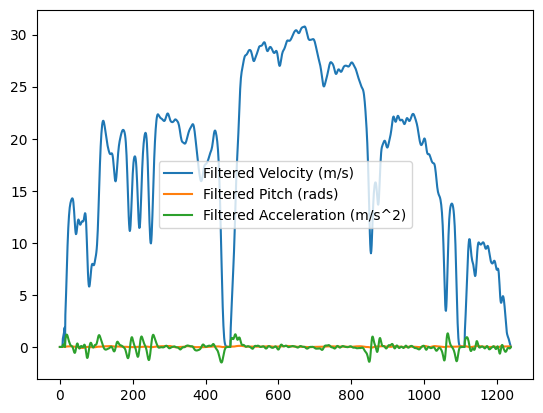

In [5]:
plt.figure()
plt.plot(t,v_filtered,label='Filtered Velocity (m/s)')
# plt.plot(t,v,label='Raw Velocity (m/s)')
plt.plot(t,alpha_filtered,label='Filtered Pitch (rads)')
# plt.plot(t,alpha,label='Raw Pitch (rads)')
plt.plot(t,a_filtered,label='Filtered Acceleration (m/s^2)')
# plt.plot(t,a,label='Raw Acceleration (m/s^2)')
plt.legend()
plt.show()

Export the trip data

In [7]:
np.save('../data/trip-velocity.npy',v_filtered)
np.save('../data/trip-acceleration.npy',a_filtered)
np.save('../data/trip-slope.npy',alpha_filtered)
np.save('../data/trip-time',t)